In [281]:

import numpy as np
from tqdm import tqdm,trange
np.set_printoptions(suppress=True)
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [111]:
import torchvision.datasets as datasets
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [291]:
class scratch_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(28*28,128)
        self.l2=nn.Linear(128,10)
    
    def forward(self,x):
        x=F.relu(self.l1(x))
        x=self.l2(x)
        return x


In [292]:
class Dataloader:
    def __init__(self,data,bs):
        self.data=data
        self.bs=bs

    def __getitem__(self,idx):
        img=torch.zeros(self.bs,28*28)
        label=torch.zeros(self.bs,1)

        for i in range(len(idx)):
            img[i]=torch.tensor(np.array(self.data[idx[i]][0]).reshape(-1,28*28)).float()
            label[i]=torch.tensor((self.data[idx[i]][1]))
        return (img,label.view(-1).long())

    def __len__(self):
        return len(self.data)
    def __repr__(self):
        return f'Dataset with batch_size {self.bs}'
        
    def __str__(self):
        return f'Dataset with batch_size {self.bs}'
        

In [293]:
batch_size=32
x_train=Dataloader(train,batch_size)
x_test=Dataloader(test,batch_size)


In [294]:
model=scratch_net()
losses,accs=[],[]
optim=torch.optim.Adam(model.parameters())
for i in (t := trange(1000)):
    optim.zero_grad()
    samp=torch.randint(0,len(x_train),(batch_size,))
    x,y=x_train[samp]
    logits=model(x)
    loss=F.cross_entropy(logits,y)
    loss.backward()
    optim.step()
    losses.append(loss.item())
    pred=torch.argmax(logits,dim=-1)
    acc=(pred==y).float().mean()
    accs.append(acc)
    t.set_description(f'{loss},{acc}')
    
    

0.005852986592799425,1.0: 100%|████████████| 1000/1000 [00:02<00:00, 346.73it/s]


(0.0, 1.5)

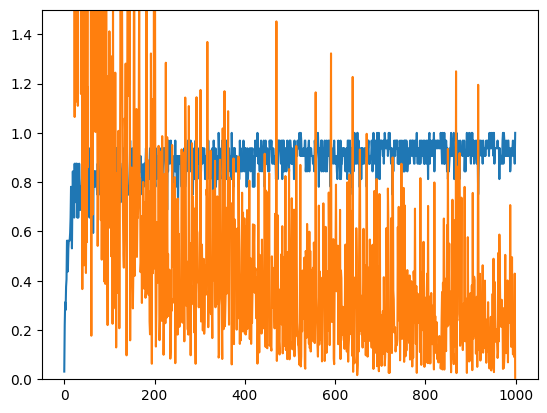

In [295]:
plt.plot(accs)
plt.plot(losses)
plt.ylim(0,1.5)

In [325]:
samp=torch.randint(0,len(x_test),(batch_size,))
x,y=x_test[samp]
logits=model(x)
pred=torch.argmax(logits,dim=-1)
loss=F.cross_entropy(logits,y)
print(y)
print(pred)
acc=(pred==y).float().mean()
print(acc)
print(loss)

tensor([3, 7, 3, 7, 2, 6, 1, 5, 1, 7, 9, 6, 1, 3, 4, 0, 0, 6, 6, 5, 2, 5, 2, 5,
        5, 7, 0, 7, 5, 7, 0, 2])
tensor([3, 7, 3, 7, 2, 6, 1, 5, 1, 7, 9, 6, 1, 3, 4, 0, 0, 6, 6, 5, 2, 5, 2, 5,
        5, 7, 0, 7, 5, 7, 0, 2])
tensor(1.)
tensor(0.0506, grad_fn=<NllLossBackward0>)


In [328]:
model.l1.weight.shape

torch.Size([128, 784])

0